# 4. Unsupervised learning algorithms

비지도 학습은 학습은 독자적으로 개념을 학습하는 알고리즘을 의미  
지도학습을 활용하여 감독되지 않은 학습을 이해해보면  

분류된 입력 학습 데이터 세트를 요구하는 지도 학습 알고리즘과는 달리, 비지도학습 알고리즘은 분류된 학습 데이터 세트없이 데이터의 관계 및 패턴을 찾음  
이러한 알고리즘은 입력 데이터를 처리하여 규칙을 찾고, 패턴을 감지하고, 의미있는 통찰력을 얻는 데 도움이 됨  
비지도학습 알고리즘의 경우, 교육 및 테스트 데이터 세트에 대한 개념이 없고 오히려 입력 데이터가 분석되어 패턴과 관계를 도출하는 데 사용됨  

비지도 학습은 2가지 주요 범주로 나눌 수 있음  

* 연관 규칙 기반 머신러닝 :이 알고리즘은 입력 데이터를 마이닝하여 패턴 및 규칙을 식별  
이 규칙은 빈번한 항목 집합과 데이터에서 발생하는 패턴을 묘사하기 위해 데이터 집합의 변수 간의 흥미로운 관계를 설명함  
이러한 규칙은 거대한 데이터 저장소에서 모든 비즈니스 또는 조직에 대한 유용한 통찰력을 찾는데 도움이 됨  
인기있는 알고리즘으로는 **Apriori**와 **FP-Growth**가 있음  

* 클러스터링 기반 머신러닝 : 지도 학습 기반 분류 알고리즘과 유사하게, 이러한 알고리즘의 주요 목적은 입력 데이터만으로 얻은 특징만을 사용하여 입력 데이터 포인트를 다른 클래스 또는 카테고리로 클러스터링하거나 그룹화하는 것  
정보. 분류와 달리 출력 레이블은 클러스터링에서 미리 알 수 없음  
일부 대중적인 클러스터링 알고리즘에는 **k-means**, **k-medoids** 및 **계층 적 클러스터링**이 포함 

## 0. Setup

In [5]:
library(repr)
options(repr.plot.width=7, repr.plot.height=4)
options(buildtools.check = function(action) TRUE)
        
library(dplyr)        


Attaching package: ‘dplyr’

The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## 4.1 Apriori algorithm
### 4.1.1 개념

* 이 알고리즘은 1993 년 Agarwal과 Srikant에 의해 제안됨  
* 각 트랜잭션이 항목 집합인 트랜잭션 데이터를 처리하도록 설계됨  
* 알고리즘은 데이터 집합에서 적어도 $C$ 트랜잭션의 하위 집합 인 항목 집합을 식별  

* 지지도(support) :  
한 거래 항목 안에 A와 B를 동시에 포함하는 거래의 비율. 지지도는 A와 B가 함께 등장할 확률이다. 전체 거래의 수를 A와 B가 동시에 포함된 거래수를 나눠주면 구할 수 있음  

* 신뢰도(confidence) :  
항목 A가 포함하는 거래에 A와 B가 같이포함될 확률. 신뢰도는 조건부 확률과 유사  
A의 확률을 A와 B가 동시에 포함될 확률을 나눠주면 구할 수 있음  

* 향상도(lift) :  
A가 주어지지 않을 때의 품목 B의 확률에 비해 A가 주어졌을 때 품목 B의 증가 비율. 

* lift 값은 1이면 서로 독립적인 관계이며 1보다 크면 두 품목이 서로 양의 상관관계, 1보다 작으면 두 품목이 서로 음의 상관관계  
A와 B가 독립이면 분모, 분자가 같기 때문에 1이 나옴

### 4.1.2 Apriori 알고리즘의 분석 순서

1. 최소 지지도를 설정(support)  
2. 개별 품목 중에서 최소지지도를 넘는 모든 품목을 찾음  
3. 위에서 찾은 개별 품목만을 이용해 최소 지지도를 넘는 2가지 품목을 찾음  
4. 위의 두 절차에서 찾은 품목 집합을 결함하여 최소 지지도를 넘는 3가지 품목 집합을 찾음  
5. 반복적으로 수행에 최소지지도가 넘는 반발품목 집합을 찾음  

---

**연관규칙의 장점**  
1. 조건 반응으로 표현되는 연관분성석의 결과 이해가 쉬움  
2. 분석 방향이나 목적이 특별히 없는 경우 목적변수가 없으므로 유용  
3. 데이터를 변환 없이 그 자체로 이용 가능  
4. 계산이 상당히 간단  

**연관규칙의 단점**  
1. 품목수가 많을수록 분석에 필요한 계산이 기하급수적으로 늘어남  
2. 너무 세분화 품목을 가지고 규칙을 찾으면 아무 의미 없는 분석이 될 수 있음  
3. 거래량이 적은 품목은 거래수가 적어 규칙 발견시 제외하기 쉬움  

### 4.1.3 데이터셋 준비

* 데이터 세트는 UCI 기계 학습 저장소의 adult 데이터 세트  
* 이 데이터 세트에는 *성별, 연령, 결혼 상태, 출신 국가 및 직업과 같은 속성과 직업 분류, 소득 등과 같은 경제적 속성*이 포함  
* Apriori 알고리즘은 arules 라이브러리에 있음  

In [1]:
# setting the apriori library
library(arules)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
# loading data
data("Adult")

In [3]:
# summary of data set
summary(Adult)

transactions as itemMatrix in sparse format with
 48842 rows (elements/itemsets/transactions) and
 115 columns (items) and a density of 0.1089939 

most frequent items:
           capital-loss=None            capital-gain=None 
                       46560                        44807 
native-country=United-States                   race=White 
                       43832                        41762 
           workclass=Private                      (Other) 
                       33906                       401333 

element (itemset/transaction) length distribution:
sizes
    9    10    11    12    13 
   19   971  2067 15623 30162 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   12.00   13.00   12.53   13.00   13.00 

includes extended item information - examples:
           labels variables      levels
1       age=Young       age       Young
2 age=Middle-aged       age Middle-aged
3      age=Senior       age      Senior

includes extended transaction information - examp

In [4]:
# Sample 5 records
inspect(Adult[0:5])

    items                               transactionID
[1] {age=Middle-aged,                                
     workclass=State-gov,                            
     education=Bachelors,                            
     marital-status=Never-married,                   
     occupation=Adm-clerical,                        
     relationship=Not-in-family,                     
     race=White,                                     
     sex=Male,                                       
     capital-gain=Low,                               
     capital-loss=None,                              
     hours-per-week=Full-time,                       
     native-country=United-States,                   
     income=small}                                  1
[2] {age=Senior,                                     
     workclass=Self-emp-not-inc,                     
     education=Bachelors,                            
     marital-status=Married-civ-spouse,              
     occupation=Exec-manager

In [8]:
# executing apriori with support=50% confidence =80%
rules = apriori(Adult, parameter=list(support=0.5, confidence=0.8,target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [84 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [9]:
# view a summary
summary(rules)

set of 84 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4 
 4 23 38 19 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.857   3.000   4.000 

summary of quality measures:
    support         confidence          lift            count      
 Min.   :0.5084   Min.   :0.8504   Min.   :0.9789   Min.   :24832  
 1st Qu.:0.5415   1st Qu.:0.8888   1st Qu.:0.9943   1st Qu.:26447  
 Median :0.5897   Median :0.9132   Median :0.9988   Median :28803  
 Mean   :0.6433   Mean   :0.9110   Mean   :1.0034   Mean   :31422  
 3rd Qu.:0.7490   3rd Qu.:0.9422   3rd Qu.:1.0077   3rd Qu.:36585  
 Max.   :0.9533   Max.   :0.9583   Max.   :1.0586   Max.   :46560  

mining info:
  data ntransactions support confidence
 Adult         48842     0.5        0.8

In [10]:
#view top 3 rules
as(head(sort(rules, by = c("confidence", "support")), n=3), "data.frame")

,rules,support,confidence,lift,count
7,{hours-per-week=Full-time} => {capital-loss=None},0.5606650,0.9582531,1.005219,27384
15,{workclass=Private} => {capital-loss=None},0.6639982,0.9564974,1.003377,32431
50,"{workclass=Private,native-country=United-States} => {capital-loss=None}",0.5897179,0.9554818,1.002312,28803


## 4.2 K-Means

### 4.2.1 개념

비지도학습 클러스터링 알고리즘의 세계에서 가장 간단하고 널리 사용되는 알고리즘은 **K-Means**  
비지도학습은 알고리즘은 사전 레이블이나 훈련없이 입력 데이터를 처리하여 패턴과 관계를 도출  
특히 클러스터링 알고리즘은 데이터 포인트를 클러스터링하거나 파티셔닝하는 데 도움이 됨  

정의에 따라 클러스터링은 그룹의 요소가 다른 그룹의 요소보다 서로 유사하도록 개체를 그룹으로 그룹화하는 작업을 의미  
수학적으로, 각 관찰이 $d$ 차원 벡터인 $n$개의 관측 $\{x_1, \,x_2,\, \cdots ,\, x_n\}$이 주어지면 알고리즘은 목적 함수를 최소화하여 이러한 $n$ 관측을 $k (\le n)$ 세트로 분할하려고 시도  

다른 알고리즘과 마찬가지로 다른 목적 함수가있을 수 있는데 이를 간단히 하기 위해 **with-in cluster sum of squares** 또는 **WCSS** 함수라고 불리는 가장 널리 사용되는 함수를 사용할 수 있음  

$n$개의 관측 세트 = $\{x_1,\, x_2,\, \cdots ,\, x_n\}$  
분할의 집합 $S$ = $\{S_1,\, S_2,\, \cdots ,S_k\}$  

목표는 내부 클러스터 합계를 최소화하는 것:  

$$arg \, min_{s}\sum^{k}_{x=1}\sum{\|X-\mu_{i}\|}$$

여기서 $\mu_{i}$는 파티션$S_{i}$점들의 평균임  

알고리즘은 간단한 2단계 반복 프로세스를 따르며, 여기서 첫 번째 단계는 할당 단계라고 부르며, 이어서 업데이트 단계가 이어짐  

* $k$ 파티션을 위한 수단을 설정하여 초기화: $m_1,\, m_2,\, \cdots ,\, m_k$
* 평균이 변하지 않거나 변화가 특정 임계 값보다 낮을 때까지 :  
    * **할당 단계** : with-in 클러스터 합 제곱 값이 최소인 파티션에 각 관측치를 할당  
    * 관측치에 평균이 가장 가까운 파티션에 관측치를 할당  

* 업데이트 단계 : 1에서 $k$까지의 $i$에 대해, 해당 파티션의 모든 관측을 기반으로 각 평균 $m_i$를 업데이트  

K-means 알고리즘은 다른 초기화 메소드를 사용할 수 있음  
가장 일반적인 것들은 **Forgy**와 **Random Partition** 방법  

In [12]:
iris %>% head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [14]:
# prepare a copy of iris data set
kmean_iris = iris

#Erase/ Nullify species labels
kmean_iris$Species = NULL

In [15]:
#apply k-means with k=3
clusters = kmeans(kmean_iris, 3)
clusters

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [16]:
# comparing cluster labels with actual iris  species labels.
table(iris$Species, clusters$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

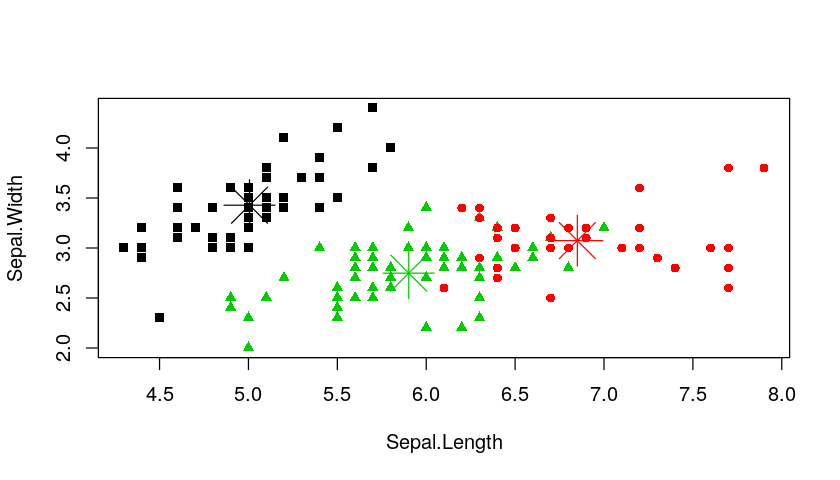

In [17]:
# plot the clustered points along sepal length and width
plot(kmean_iris[c("Sepal.Length", "Sepal.Width")], 
     col=clusters$cluster,
     pch = c(15, 16, 17)[as.numeric(clusters$cluster)])
points(clusters$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=4)